In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split



data = pd.read_csv('FuelConsumption.csv')
data.tail(100)
data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [3]:
data.describe()

MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000   
25%               7.500000              9.000000                 21.000000   
50%               8.800000             10.900000                 26.000000   
75%              10.850000             13.350000                 31.000000   
max              20.500000             25.800000                 60.000000   

       CO2EMISSIONS  
count   1067.000000  
mean     256.228679  
std       63.372304  
min      108.000000  
25%      207.000000  
50%      251.000000  
75%      294.000000  
max      488.000000

In [4]:
data

MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0             AS5        Z                   9.9                  6.7   
1              M6        Z                  11.2                  7.7   
2             AV7        Z                   6.0                  5.8   
3             AS6        Z                  12.7                  9.1   
4             AS6        Z                  12.1                  8.7   
...           ...      ...                   ...                  ...   
1062          AS6        X                  13.4                  9.8   
1063          AS6        X                  13.2                  9.5   
1064          AS6        X                  13.4                  9.8   
1065          AS6        X                  12.9                  9.3   
1066          AS6        X                  14.9                 10.2   

      FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                      8.5                        33           196  
1                      9.6                        29           221  
2                      5.9                        48           136  
3                     11.1                        25           255  
4                     10.6                        27           244  
...                    ...                       ...           ...  
1062                  11.8                        24           271  
1063                  11.5                        25           264  
1064                  11.8                        24           271  
1065                  11.3                        25           260  
1066                  12.8                        22           294  

[1067 rows x 13 columns]

In [5]:
data.drop(columns=['MODELYEAR','MAKE','MODEL','VEHICLECLASS','TRANSMISSION'],inplace=True)
data

ENGINESIZE  CYLINDERS FUELTYPE  FUELCONSUMPTION_CITY  \
0            2.0          4        Z                   9.9   
1            2.4          4        Z                  11.2   
2            1.5          4        Z                   6.0   
3            3.5          6        Z                  12.7   
4            3.5          6        Z                  12.1   
...          ...        ...      ...                   ...   
1062         3.0          6        X                  13.4   
1063         3.2          6        X                  13.2   
1064         3.0          6        X                  13.4   
1065         3.2          6        X                  12.9   
1066         3.2          6        X                  14.9   

      FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
0                     6.7                   8.5                        33   
1                     7.7                   9.6                        29   
2                     5.8                   5.9                        48   
3                     9.1                  11.1                        25   
4                     8.7                  10.6                        27   
...                   ...                   ...                       ...   
1062                  9.8                  11.8                        24   
1063                  9.5                  11.5                        25   
1064                  9.8                  11.8                        24   
1065                  9.3                  11.3                        25   
1066                 10.2                  12.8                        22   

      CO2EMISSIONS  
0              196  
1              221  
2              136  
3              255  
4              244  
...            ...  
1062           271  
1063           264  
1064           271  
1065           260  
1066           294  

[1067 rows x 8 columns]

In [6]:
data[['FUELTYPE']].value_counts()

FUELTYPE
X           514
Z           434
E            92
D            27
dtype: int64

In [7]:
data.drop(columns=['FUELTYPE'],inplace=True)

In [8]:
data.describe()

ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
count  1067.000000  1067.000000           1067.000000          1067.000000   
mean      3.346298     5.794752             13.296532             9.474602   
std       1.415895     1.797447              4.101253             2.794510   
min       1.000000     3.000000              4.600000             4.900000   
25%       2.000000     4.000000             10.250000             7.500000   
50%       3.400000     6.000000             12.600000             8.800000   
75%       4.300000     8.000000             15.550000            10.850000   
max       8.400000    12.000000             30.200000            20.500000   

       FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
count           1067.000000               1067.000000   1067.000000  
mean              11.580881                 26.441425    256.228679  
std                3.485595                  7.468702     63.372304  
min                4.700000                 11.000000    108.000000  
25%                9.000000                 21.000000    207.000000  
50%               10.900000                 26.000000    251.000000  
75%               13.350000                 31.000000    294.000000  
max               25.800000                 60.000000    488.000000

array([[<AxesSubplot:title={'center':'ENGINESIZE'}>,
        <AxesSubplot:title={'center':'CYLINDERS'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_CITY'}>],
       [<AxesSubplot:title={'center':'FUELCONSUMPTION_HWY'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_COMB_MPG'}>],
       [<AxesSubplot:title={'center':'CO2EMISSIONS'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

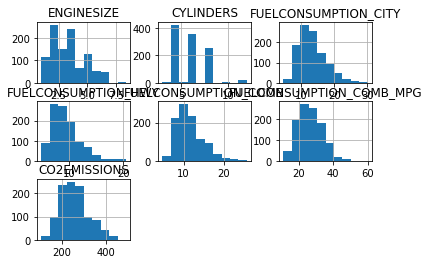

In [9]:
data.hist()

array([[<AxesSubplot:title={'center':'ENGINESIZE'}>]], dtype=object)

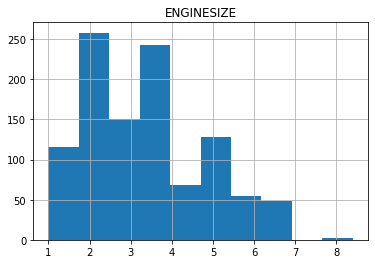

In [10]:
data[['ENGINESIZE']].hist()

array([[<AxesSubplot:title={'center':'CYLINDERS'}>]], dtype=object)

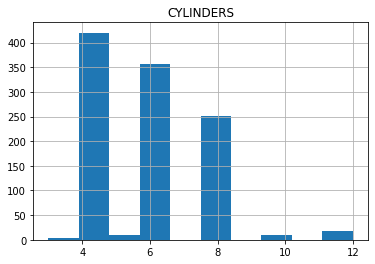

In [11]:
data[['CYLINDERS']].hist()

array([[<AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>]],
      dtype=object)

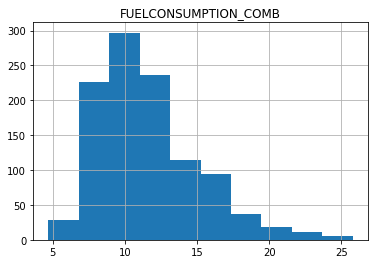

In [12]:
data[['FUELCONSUMPTION_COMB']].hist()

In [13]:
data.corr()

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  \
ENGINESIZE                  1.000000   0.934011              0.832225   
CYLINDERS                   0.934011   1.000000              0.796473   
FUELCONSUMPTION_CITY        0.832225   0.796473              1.000000   
FUELCONSUMPTION_HWY         0.778746   0.724594              0.965718   
FUELCONSUMPTION_COMB        0.819482   0.776788              0.995542   
FUELCONSUMPTION_COMB_MPG   -0.808554  -0.770430             -0.935613   
CO2EMISSIONS                0.874154   0.849685              0.898039   

                          FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  \
ENGINESIZE                           0.778746              0.819482   
CYLINDERS                            0.724594              0.776788   
FUELCONSUMPTION_CITY                 0.965718              0.995542   
FUELCONSUMPTION_HWY                  1.000000              0.985804   
FUELCONSUMPTION_COMB                 0.985804              1.000000   
FUELCONSUMPTION_COMB_MPG            -0.893809             -0.927965   
CO2EMISSIONS                         0.861748              0.892129   

                          FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
ENGINESIZE                               -0.808554      0.874154  
CYLINDERS                                -0.770430      0.849685  
FUELCONSUMPTION_CITY                     -0.935613      0.898039  
FUELCONSUMPTION_HWY                      -0.893809      0.861748  
FUELCONSUMPTION_COMB                     -0.927965      0.892129  
FUELCONSUMPTION_COMB_MPG                  1.000000     -0.906394  
CO2EMISSIONS                             -0.906394      1.000000

<AxesSubplot:>

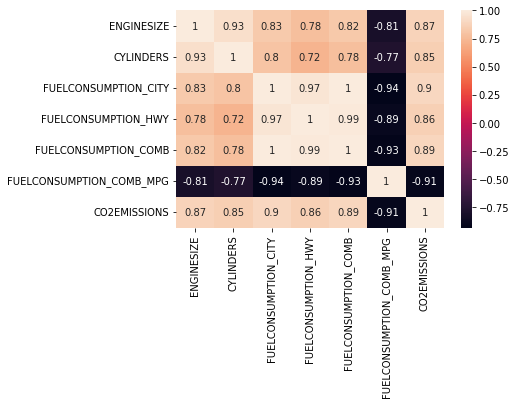

In [14]:
sns.heatmap(data.corr(),annot=True)

In [15]:
data.drop(columns=['FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG'],inplace=True)
data

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  CO2EMISSIONS
0            2.0          4                   9.9           196
1            2.4          4                  11.2           221
2            1.5          4                   6.0           136
3            3.5          6                  12.7           255
4            3.5          6                  12.1           244
...          ...        ...                   ...           ...
1062         3.0          6                  13.4           271
1063         3.2          6                  13.2           264
1064         3.0          6                  13.4           271
1065         3.2          6                  12.9           260
1066         3.2          6                  14.9           294

[1067 rows x 4 columns]

<AxesSubplot:>

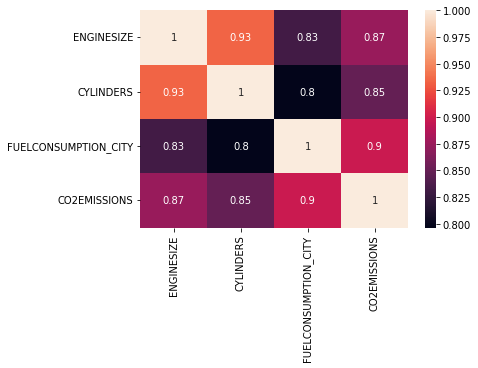

In [16]:
sns.heatmap(data.corr(),annot=True)

In [17]:
target = data[['CO2EMISSIONS']]
target

CO2EMISSIONS
0              196
1              221
2              136
3              255
4              244
...            ...
1062           271
1063           264
1064           271
1065           260
1066           294

[1067 rows x 1 columns]

In [18]:
feature = data.drop(columns=['CO2EMISSIONS'])
feature

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY
0            2.0          4                   9.9
1            2.4          4                  11.2
2            1.5          4                   6.0
3            3.5          6                  12.7
4            3.5          6                  12.1
...          ...        ...                   ...
1062         3.0          6                  13.4
1063         3.2          6                  13.2
1064         3.0          6                  13.4
1065         3.2          6                  12.9
1066         3.2          6                  14.9

[1067 rows x 3 columns]

In [19]:
from sklearn.model_selection import  train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(feature,target,test_size=.25,random_state=1)


In [20]:
xtrain.shape,xtest.shape


((800, 3), (267, 3))

In [21]:
ytrain.shape,ytest.shape

((800, 1), (267, 1))

In [22]:
feature

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY
0            2.0          4                   9.9
1            2.4          4                  11.2
2            1.5          4                   6.0
3            3.5          6                  12.7
4            3.5          6                  12.1
...          ...        ...                   ...
1062         3.0          6                  13.4
1063         3.2          6                  13.2
1064         3.0          6                  13.4
1065         3.2          6                  12.9
1066         3.2          6                  14.9

[1067 rows x 3 columns]

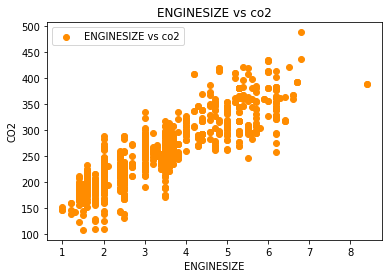

In [23]:
#choosing model

plt.scatter(feature.ENGINESIZE,target.values,color='darkorange',label='ENGINESIZE vs co2')
plt.title('ENGINESIZE vs co2')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2')
plt.legend()
plt.show()

In [24]:
#modeling

from  sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain[['ENGINESIZE']],ytrain)


LinearRegression()

In [25]:
model.intercept_

array([124.23458595])

In [26]:
model.coef_

array([[39.54874496]])

In [27]:
ypred = model.predict(xtest[['ENGINESIZE']])
xtest[['ENGINESIZE']].iloc[0],ypred[0],ytest.values[0]

(ENGINESIZE    3.0
 Name: 133, dtype: float64,
 array([242.88082083]),
 array([274]))

In [28]:
#error
ytest.values[0]-ypred[0]

array([31.11917917])

In [29]:
#evaluation
from sklearn.metrics import  mean_absolute_error,mean_squared_error,r2_score
print("ABsolute:",mean_absolute_error(ytest,ypred))
print("Mean Square:",mean_squared_error(ytest,ypred))
print("R2Score:",r2_score(ytest,ypred))

ABsolute: 23.183704964940226
Mean Square: 947.2869872487787
R2Score: 0.7633265438534859


In [30]:
model2 = LinearRegression()
model2.fit(xtrain[['CYLINDERS']],ytrain)
ypred = model2.predict(xtest[['CYLINDERS']])

print("ab:",mean_absolute_error(ytest,ypred))
print("Mean Sq",mean_squared_error(ytest,ypred))
print("R2Score",r2_score(ytest,ypred))

ab: 25.142250287715495
Mean Sq 1060.648995796043
R2Score 0.7350037876879927


In [31]:
model3 = LinearRegression()
model3.fit(xtrain[['FUELCONSUMPTION_CITY']],ytrain)
ypred = model3.predict(xtest[['FUELCONSUMPTION_CITY']])

print("ab",mean_absolute_error(ytest,ypred))
print("Mean SQ",mean_squared_error(ytest,ypred))
print("R2SCORE",r2_score(ytest,ypred))

ab 20.185092379335003
Mean SQ 847.1415775522806
R2SCORE 0.788347219265608


In [32]:
# Saving MOdel
from joblib import dump
dump(model3, 'Lr')

['Lr']

In [35]:
model4 = LinearRegression()
model4.fit(xtrain,ytrain)
ypred = model4.predict(xtest)



array([[256.07072626],
       [194.73618633],
       [198.50146978],
       [184.67593189],
       [304.44382441],
       [223.23507377],
       [190.72460472],
       [194.3660549 ],
       [237.06061166],
       [198.13133835],
       [219.7337413 ],
       [260.39120685],
       [203.31591506],
       [364.97550068],
       [202.79133414],
       [192.42218072],
       [191.09473615],
       [315.86213966],
       [262.95287898],
       [216.27735683],
       [446.58832001],
       [214.88867979],
       [255.85504432],
       [256.90420615],
       [276.59335115],
       [241.38109225],
       [160.92143087],
       [285.89705828],
       [185.04606332],
       [232.20121838],
       [227.55555436],
       [369.29598127],
       [247.39914885],
       [362.9866785 ],
       [284.26071473],
       [315.46139201],
       [350.48858519],
       [177.79377917],
       [347.15466563],
       [257.08927186],
       [241.38109225],
       [368.44621692],
       [214.91929602],
       [259

In [36]:
model4.coef_

array([[12.0361132 ,  5.48464928,  8.64096118]])

In [37]:
model4.intercept_

array([69.53741893])

In [39]:

print("AB:E",mean_absolute_error(ytest,ypred))
print("Mena Square Error",mean_squared_error(ytest,ypred))
print("R2Score",r2_score(ytest,ypred))

AB:E 17.088547401405325
Mena Square Error 575.8397651491649
R2Score 0.8561302021045728


In [47]:
#cross validaton

from sklearn.model_selection import  KFold
accurate = []
folds = KFold(n_splits=5)
for train_index,test_index in folds.split(feature):
    #print(train_index,test_index)
    xtrain = feature.iloc[train_index]
    ytrain = target.iloc[train_index]
    
    xtest = feature.iloc[test_index]
    ytest = target.iloc[test_index]
    
    model5 =  LinearRegression()
    model5.fit(xtrain,ytrain)
    ypred = model5.predict(xtest)
    
    print("AB Err",mean_absolute_error(ytest,ypred))
    print("Mena SQ",mean_squared_error(ytest,ypred))
    print("R2SCORE " ,r2_score(ytest,ypred))
    print()
    accurate.append(r2_score(ytest,ypred))

AB Err 14.078555998236443
Mena SQ 389.94053862409993
R2SCORE  0.8862755671210532

AB Err 24.456004132897302
Mena SQ 1127.4299414243753
R2SCORE  0.76899485201351

AB Err 19.444832254974607
Mena SQ 717.3735314289813
R2SCORE  0.8186056665121977

AB Err 15.859065273313643
Mena SQ 435.3427527658032
R2SCORE  0.8852711218370433

AB Err 14.454705959453191
Mena SQ 366.56174986803353
R2SCORE  0.8952183595505571



In [48]:
print("average",sum(accurate)/5)

average 0.8508731134068723


In [50]:
from sklearn.model_selection import  cross_val_score

cvmodel = LinearRegression()
cv = cross_val_score(cvmodel,feature,target,cv=10)
cv, cv.mean()

(array([0.92026691, 0.84939559, 0.73940185, 0.83232468, 0.81342395,
        0.82255311, 0.88161856, 0.88799364, 0.9137904 , 0.86623948]),
 0.8527008169436311)

In [52]:
#model Visualization

model6 = LinearRegression()
model6.fit(feature[['ENGINESIZE']],target)

LinearRegression()

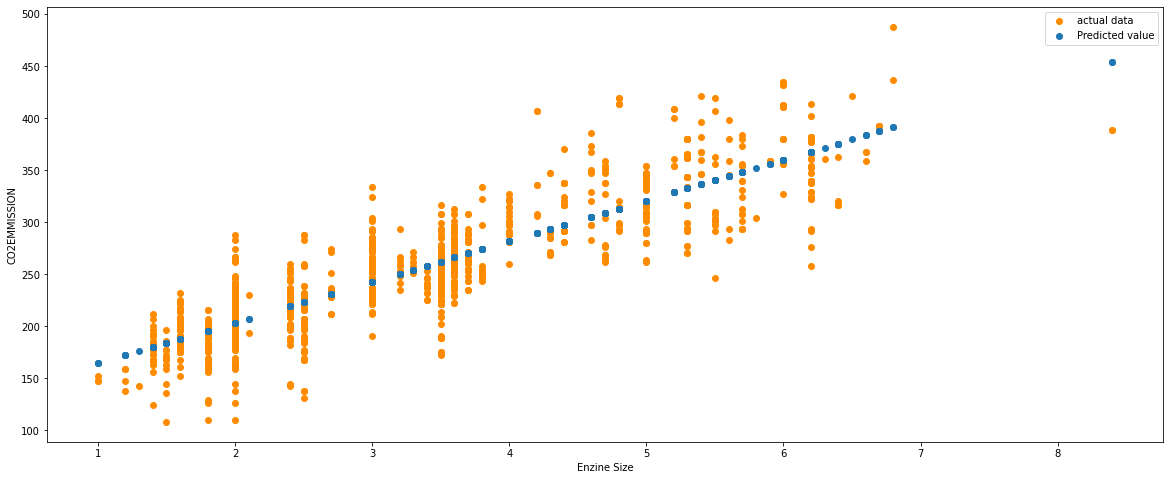

In [56]:
plt.figure(1,figsize=(20,8))
plt.scatter(feature[['ENGINESIZE']],target,label="actual data",color='darkorange')
plt.scatter(feature[['ENGINESIZE']],model6.predict(feature[['ENGINESIZE']]),label="Predicted value")
plt.legend()
plt.xlabel("Enzine Size")
plt.ylabel("CO2EMMISSION")
plt.show()

In [58]:
from  joblib import dump
dump(model4,"Model")

['Model']

In [64]:
from joblib import  load
mod = load('Model')
data = {"ENGINESIZE":[10],'CYLINDERS':[11],'FUELCONSUMPTION_CITY':[2]}
df = pd.DataFrame(data)
mod.predict(df)


array([[267.51161534]])